<a href="https://colab.research.google.com/github/JoseAaronE/FisicaComputacional/blob/master/Actividad7/actividad7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 7 

Esquivel Ovilla José Aarón 


In [1]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt

**Ejercicio 1.** Defina las siguientes matrices.

\begin{equation*}
 A
 =
  \begin{bmatrix}
   1 & 3 \\
   -1 & 7
   \end{bmatrix}
\end{equation*}

\begin{equation*}
 B =
  \begin{bmatrix}
   5 & 2 \\
   1 & 2
   \end{bmatrix}
\end{equation*}

 y la matrix identidad 

 \begin{equation*}
 I = 
   \begin{bmatrix}
   1 & 0 \\
   0 & 1
   \end{bmatrix}
\end{equation*}

Calcule el resultado de $2*I+3*A+A@B$.

In [2]:
#Definimos la matriz A
A = np.array ([[1,3],[-1,7]])
#Definimos la matriz B
B = np.array([[5,2],[1,2]])
#Definimos la matriz identidad para 2x2 
I = np.eye(2, dtype=int)
#Hacemos los caculos que nos piden 

D =  2 * I + 3 * A + A@B
print(D)

[[13 17]
 [-1 35]]


**Ejercicio 2**. Los polinomios característicos y el Teorema de Cayley-Hamilton.

El polinomio característico de una matriz M esta dado en general por la ecuación 
\begin{equation}
\det(M - \lambda I) = 0
\end{equation}
Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como
\begin{equation}
P_2 (\lambda) = \det{(M)} - \mathrm{tr}(M) \, \lambda + \lambda^2   
\end{equation}
y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

\begin{equation}
P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3
\end{equation}

[El Teorema de Cayley-Hamilton] nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico
\begin{equation}
P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 
\end{equation}
y en general cualquier matriz cuadrada M (nxn), satisface $P_n(M)$. 

Demuestre esto para cualquier matriz M (2x2),  ($\det(M) \neq 0$).

In [3]:
#Definimos a nuestra matriz 2x2 
a = float( input( "Introduzca el valor de a: " ) )
b = float( input( "Introduzca el valor de b: " ) )
c = float( input( "Introduzca el valor de c: " ) )
d = float( input( "Introduzca el valor de d: " ) )

M = np.array([[a,b],[c,d]])
I = np.eye(2, dtype=int)
#obtenemos el determinante de la matriz 
det= la.det(M)
#obtenemos tr(traza)
tr = np.trace(M)
#elevamos al cuadrado la matriz M con "mpow(M,2)"
#Aplicamos el teorema de Cayley
P2 = (det*I) - (tr*M) + (mpow(M,2))
print("El determinante es:",det)
print("El polinomio caracteristico es:\n", P2)

Introduzca el valor de a: 4
Introduzca el valor de b: 5
Introduzca el valor de c: 2
Introduzca el valor de d: 4
El determinante es: 6.000000000000001
El polinomio caracteristico es:
 [[0. 0.]
 [0. 0.]]


**Ejercicio 3:**

Resuelva el sistema de ecuaciones.

\begin{eqnarray*}
x - 3 y + z & = & 1 \\ \nonumber
3 x - 4y + z & = & 5 \\ \nonumber
2 y - z & = & 0 \\ \nonumber
\end{eqnarray*}

de dos formas, utilizando el Método de Eliminación Gaussiana y la utilzando la función scipy.linalg.solve()

In [4]:
#Método de Eliminación Gaussiana.
#Primero definimos tres funciones. 

#Primera función, para poder intercambiar de posición de renglones.
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

#Segunda función, poder multiplicar un renglón por una constante no nula. 
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

#Tercera función, poder sumar un múltiplo de un reglon a otro renglón.
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A


In [5]:
#Definimos a nuestra matriz 3x3.
A = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
#Defino otra matriz para poderla combinar con la matriz aumentada
B = np.array([1,5,0]).reshape(3,1)
#Matriz aumentada 
M = A
M = np.hstack([M,B])
print(M)



[[ 1 -3  1  1]
 [ 3 -4  1  5]
 [ 0  2 -1  0]]


In [6]:
#Al primer renglón lo multiplicamos por -3 y se lo sumamos al segundo 
M = add_row(M,-3,1,0)
print(M)

[[ 1. -3.  1.  1.]
 [ 0.  5. -2.  2.]
 [ 0.  2. -1.  0.]]


In [7]:
#Ahora multiplicamos el segundo renglón por 1/5
M = scale_row(M,1/5,1)
print(M)

[[ 1.  -3.   1.   1. ]
 [ 0.   1.  -0.4  0.4]
 [ 0.   2.  -1.   0. ]]


In [8]:
#Eliminamos el tercer renglón sumando el segundo renglón multiplicado por -2
M = add_row(M,-2,2,1)
print(M)

[[ 1.  -3.   1.   1. ]
 [ 0.   1.  -0.4  0.4]
 [ 0.   0.  -0.2 -0.8]]


In [9]:
#Al primer renglón le sumamos el segundo multiplicado por 3
M = add_row(M,3,0,1)
print(M)

[[ 1.   0.  -0.2  2.2]
 [ 0.   1.  -0.4  0.4]
 [ 0.   0.  -0.2 -0.8]]


In [10]:
#Multiplicamos el tercer renglón por -1/0.2
M = scale_row(M,-1/0.2,2)
print(M)

[[ 1.   0.  -0.2  2.2]
 [ 0.   1.  -0.4  0.4]
 [ 0.   0.   1.   4. ]]


In [11]:
#Multiplico al renglón tres por 0.2 y se lo sumamos al primer renglón
M = add_row(M,0.2,0,2)
print(M)

[[ 1.00000000e+00  0.00000000e+00 -9.99200722e-17  3.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -4.00000000e-01  4.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  4.00000000e+00]]


In [12]:
#Multiplico al renglón tres por 0.4 y se lo sumamos al segundo renglón
M = add_row(M,0.4,1,2)
print(M)

[[ 1.00000000e+00  0.00000000e+00 -9.99200722e-17  3.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -8.88178420e-17  2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  4.00000000e+00]]


In [13]:
print("Podemos notar que los resultados de:", M[0,2], "y", M[1,2], "son muy pequeños y los consideramos como cero")
print("Las soluciones son")
S = M[:,3].reshape(3,1)
print("Las soluciones son x=\n",S)


Podemos notar que los resultados de: -9.992007221626409e-17 y -8.881784197001253e-17 son muy pequeños y los consideramos como cero
Las soluciones son
Las soluciones son x=
 [[3.]
 [2.]
 [4.]]


Resolviendo el mismo sistema usando utilzando la función scipy.linalg.solve()

In [14]:
#Ya tenemos nuestra matriz definida arriba como A y la sección de resultados como B
x_sol = la.solve(A,B)
print(x_sol)


[[3.]
 [2.]
 [4.]]


**Ejercicio 4:** 

Dadas las siguientes matrices $B_1, B_2$ y $B_3$
 
\begin{equation*}
B_1 = \begin{bmatrix}
2 & 0 & 0 \\
0 & 3 & 4 \\
0 & 4 & 9 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
B_2 = \begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
B_3 = \begin{bmatrix}
2 & 0 & 0 & 0\\
1 & 2 & 0 & 0 \\
0 & 1 & 3 & 0 \\
0 & 0 & 1 & 3 \\
\end{bmatrix}
\end{equation*}

Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de *scipy.linalg.eig()*, y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia. 

In [15]:
#Definimos a la matriz B1
B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
print(B1)
# Aplicamos la biblioteca scipy.linalg.eig()
#Calculamos los eigenvalores y eigenvectores de la matriz B1
eigvals, eigvecsB1 = la.eig(B1)
print('Eigenvalores:\n', eigvals)
#definimos nuestross v1,v2,v3 (valores de nuestros eigenvectores)
v1 = eigvecsB1[:,0]
v2 = eigvecsB1[:,1]
v3 = eigvecsB1[:,2]
print("Eigenvectores:" )
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)

[[2 0 0]
 [0 3 4]
 [0 4 9]]
Eigenvalores:
 [11.+0.j  1.+0.j  2.+0.j]
Eigenvectores:
v1= [0.         0.4472136  0.89442719]
v2= [ 0.          0.89442719 -0.4472136 ]
v3= [1. 0. 0.]


Podemos ver que los Eigenvectores obtenidos son multiplos escalares de los Eigenvectores de la matriz cuyos resultados de la Wikipedia que son:
[1,0,0],[0,-2,1],[0,1,2]


\begin{equation*}
B_1 = \begin{bmatrix}
2 & 0 & 0 \\
0 & 3 & 4 \\
0 & 4 & 9 \\
\end{bmatrix}
\end{equation*}

In [16]:
#Definimos la matriz B2
B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
print(B2)
#Calculamos los eigenvalores y eigenvectores de la matriz B2
eigvals, eigvecsB2 = la.eig(B2)
print('Eigenvalores:\n', eigvals)
#definimos nuestross v1,v2,v3 (valores de nuestros eigenvectores)
v1 = eigvecsB2[:,0]
v2 = eigvecsB2[:,1]
v3 = eigvecsB2[:,2]
print("Eigenvectores:" )
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)

[[0 1 0]
 [0 0 1]
 [1 0 0]]
Eigenvalores:
 [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
Eigenvectores:
v1= [ 0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j]
v2= [ 0.57735027-0.j  -0.28867513-0.5j -0.28867513+0.5j]
v3= [-0.57735027+0.j -0.57735027+0.j -0.57735027+0.j]


Podemos ver que los Eigenvectores obtenidos son multiplos escalares de los Eigenvectores de la matriz cuyos resultados de la Wikipedia.


In [17]:
#Definimos la matriz B3
B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])
print(B3)
#Calculamos los eigenvalores y eigenvectores de la matriz B2
eigvals, eigvecsB3 = la.eig(B3)
print('Eigenvalores:\n', eigvals)
#definimos nuestross v1,v2,v3 (valores de nuestros eigenvectores)
v1 = eigvecsB3[:,0]
v2 = eigvecsB3[:,1]
v3 = eigvecsB3[:,2]
v4 = eigvecsB3[:,3]
print("Eigenvectores:" )
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)
print("v4=",v4)

[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]
Eigenvalores:
 [3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores:
v1= [0. 0. 0. 1.]
v2= [ 0.00000000e+00  0.00000000e+00  6.66133815e-16 -1.00000000e+00]
v3= [ 0.          0.57735027 -0.57735027  0.57735027]
v4= [ 2.56395025e-16 -5.77350269e-01  5.77350269e-01 -5.77350269e-01]


Podemos ver que los Eigenvectores obtenidos son multiplos escalares de los Eigenvectores de la matriz cuyos resultados de la Wikipedia 


**Ejercicio 5.**
Se tienen los siguientes 8 puntos: 

\begin{eqnarray*} 
(x&,&y) \\
(0.0 &,& 0.0), \\ 
(0.5 &,& 0.47942), \\ 
(1.0 &,& 0.84147), \\
(1.5 &,& 0.99749), \\
(2.0 &,& 0.90930), \\
(2.5 &,& 0.59847), \\
(3.0 &,& 0.14112), \\
(3.5 &,& -0.35078) \\
\end{eqnarray*}

Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos. 

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.



los ocho puntos son:
 [[ 0.       0.     ]
 [ 0.5      0.47942]
 [ 1.       0.84147]
 [ 1.5      0.99749]
 [ 2.       0.9093 ]
 [ 2.5      0.59847]
 [ 3.       0.14112]
 [ 3.5     -0.35078]]


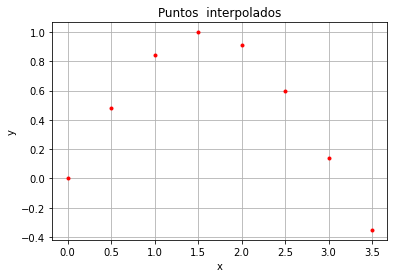

In [18]:
P = np.array([
              [0.0,0.0],
              [0.5,0.47942],
              [1.0,0.84147],
              [1.5,0.99749],
              [2.0,0.90930],
              [2.5,0.59847],
              [3.0,0.14112],
              [3.5,-0.35078]])

print("los ocho puntos son:\n",P)
#Definimos a la columna x como i 
#Definimos a la columna y como j 
i = 0
j = 1 
x = [fila[i] for fila in P]
y = [fila[j] for fila in P]
x = np.array(x)
y= np.array(y)

plt.plot(x,y,'r.')
plt.grid()
plt.title('Puntos  interpolados')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
             

In [19]:
#Determinamos la matriz de Vadermonde de los ocho puntos.
V = np.vander(x,increasing=True)
#Usamo la función para poder resolver la matriz 
R = la.solve(V,y)
print(R)

[ 0.00000000e+00  1.00067181e+00 -3.70788889e-03 -1.58867889e-01
 -8.30222222e-03  1.31964444e-02 -1.54488889e-03  2.46349206e-05]


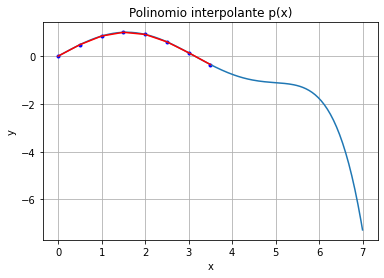

In [25]:
#Graficamos el polinomio interpolante y los puntos 
#Los puntos que interpolamos los ponemos en negro 
xs = np.linspace(0,8-1,200)
ys = sum([R[k]*xs**k for k in range(0,8)])
plt.plot(x,y,'b.',xs,ys);
plt.plot(x,np.sin(x),"r")
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Ejercicio 6.** 
Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

**NOTA:** Pueden trabajar en sus Notebooks de la Actividad 5 o 6 y hacer el ajuste de regresión lineal allá donde tienen todo cargado en la memoria y luego copiar unas celdas de texto de esa Notebook y agregarlas al final de su Notebook de la Actividad 7. Así no tienen que cargar a la memoria todas las operaciones. 

FECHA
2001-07-02    30.073252
2001-07-03    30.075789
2001-07-04    30.078349
2001-07-05    30.080938
2001-07-06    30.083573
                ...    
2005-07-29    30.724113
2005-07-30    30.726395
2005-07-31    30.728760
2005-08-01    30.731162
2005-08-02    30.733541
Name: Tmax, Length: 1492, dtype: float64

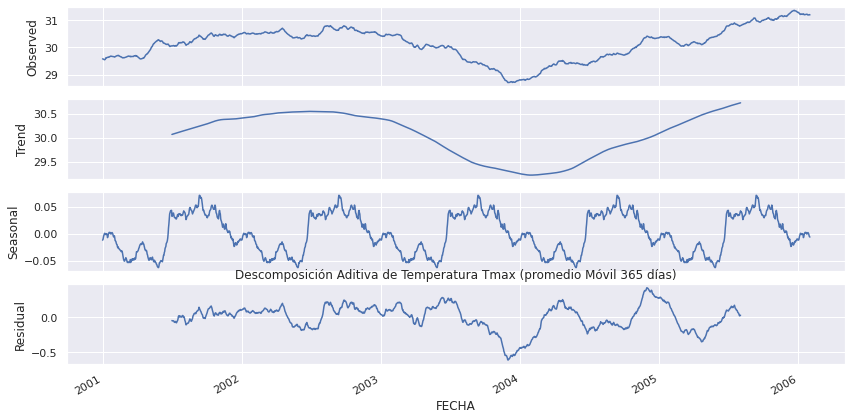

In [ ]:
#Estación 1 
#descomposición de la temperatura máxima 
#tamaño
sns.set(rc={'figure.figsize':(12, 6)})
#seleccionamos el periodo 
start, end = '2001-01', '2006-01'
# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

resTmax = sm.tsa.seasonal_decompose(df_meteo90_365.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');

trendMax = resTmax.trend
trendMax = trendMax[~np.isnan(trendMax)]
trendMax



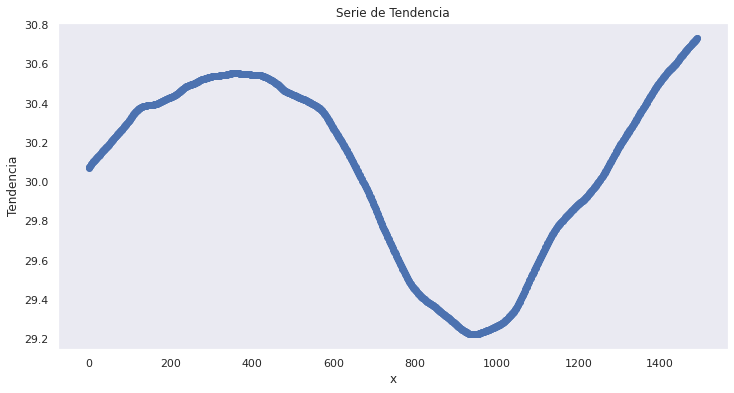

In [ ]:
N = 1492
x = np.arange(0,N)
y = trendMax
plt.scatter(x,y);
plt.grid()
plt.title('Serie de Tendencia')
plt.xlabel('x')
plt.ylabel('Tendencia')
plt.show()


In [ ]:
# Creamos la matriz X, con 1's en la primera columna y los puntos x_k en la segunda.
X = np.column_stack([np.ones(N),x])
print('Shape:', X.shape)
# Imprimimos los primeros 5 renglones para verificar
print(X[:5,:])


Shape: (1492, 2)
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


In [ ]:
# Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[ 3.03158464e+01 -3.39909770e-04]


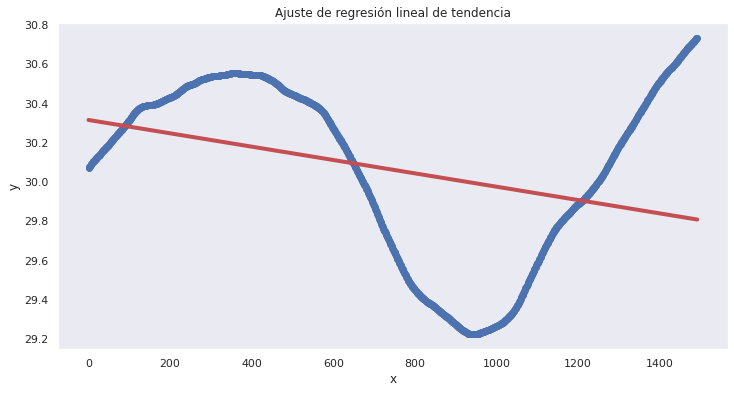

In [ ]:
# Graficamos el ajuste con esos 2 coeficientes de la regresión y = a_0 + a_1 x 
xs = np.linspace(0,N,10)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.grid()
plt.title('Ajuste de regresión lineal de tendencia')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Podemos notar que la temeratura máxima tiene una pendiente negativa 

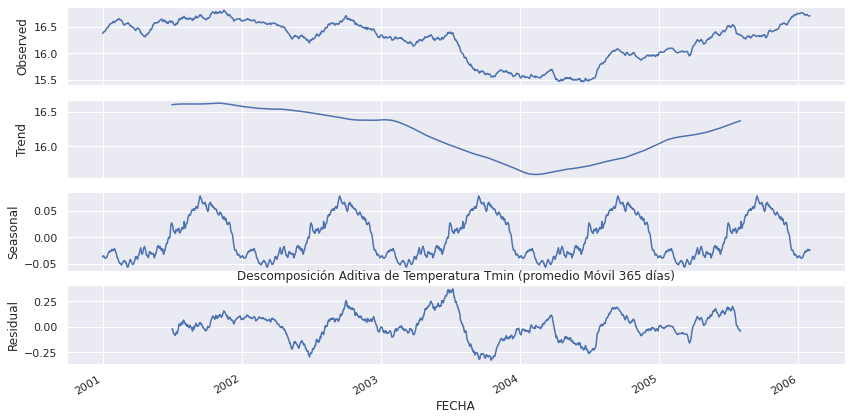

In [ ]:
#descomposición de la temperatura mínima 
sns.set(rc={'figure.figsize':(12, 6)})
decompfreq = 365
resTmin = sm.tsa.seasonal_decompose(df_meteo90_365.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');


In [ ]:
trendmin = resTmin.trend
trendmin = trendmin[~np.isnan(trendmin)]
trendmin

FECHA
2001-07-02    16.603978
2001-07-03    16.604631
2001-07-04    16.605284
2001-07-05    16.605915
2001-07-06    16.606485
                ...    
2005-07-29    16.364121
2005-07-30    16.365802
2005-07-31    16.367491
2005-08-01    16.369180
2005-08-02    16.370884
Name: Tmin, Length: 1492, dtype: float64

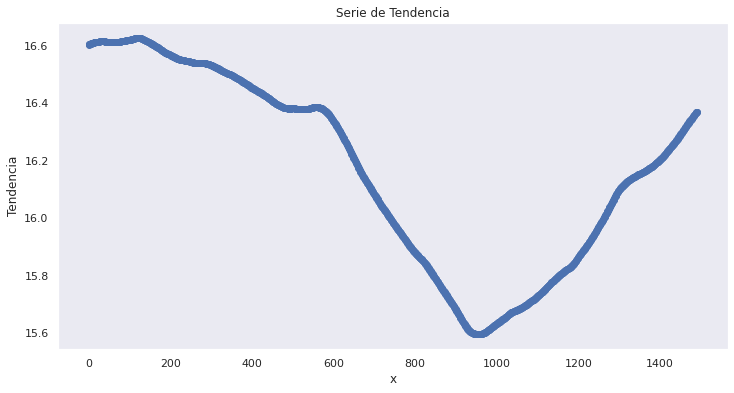

In [ ]:
N = 1492
x = np.arange(0,N)
y = trendmin
plt.scatter(x,y);
plt.grid()
plt.title('Serie de Tendencia')
plt.xlabel('x')
plt.ylabel('Tendencia')
plt.show()

In [ ]:
X = np.column_stack([np.ones(N),x])
print('Shape:', X.shape)
# Imprimimos los primeros 5 renglones para verificar
print(X[:5,:])

Shape: (1492, 2)
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


In [ ]:
# Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[ 1.65698041e+01 -5.39198841e-04]


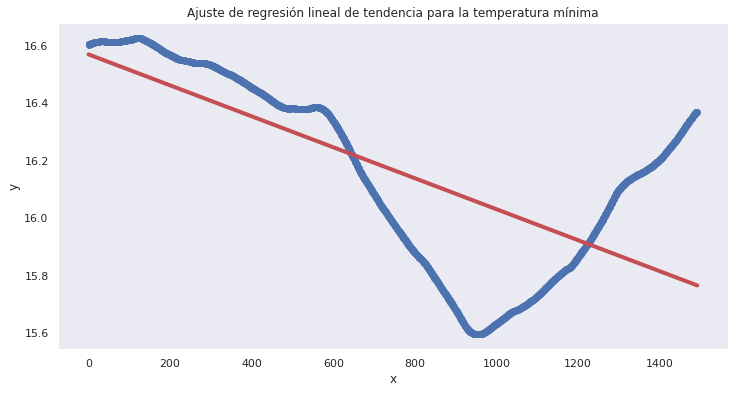

In [ ]:
# Graficamos el ajuste con esos 2 coeficientes de la regresión y = a_0 + a_1 x 
xs = np.linspace(0,N,10)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.grid()
plt.title('Ajuste de regresión lineal de tendencia para la temperatura mínima')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Podemos ver que para la temperatura mínima, igual presenta una pendiente negativa.